Imports and setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

%config InlineBackend.figure_format = 'svg'
# for half screen view
plt.rcParams['figure.figsize'] = (7, 8)
plt.rcParams['image.cmap'] = 'viridis'


##### Task 1

Install `Seaborn` if isn't installed

In [2]:
data = pd.read_csv('Data/weights_heights.csv')

<Axes: title={'center': 'Height (inch.) distribution'}, ylabel='Frequency'>

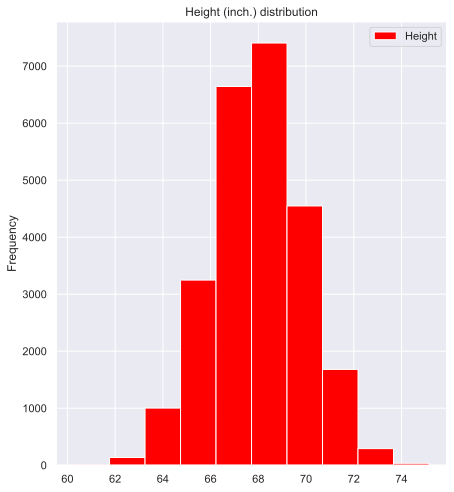

In [3]:
data.plot(y='Height', kind='hist', color='red', title='Height (inch.) distribution')

##### Task 2

Look at the first 5 records using `head` function. Draw a histogram of the weight distribution using the `plot` function. Make histogram <span style="color:green">green</span>, sign the picture

In [4]:
data.head()

Index    Height    Weight
0      1  65.78331  112.9925
1      2  71.51521  136.4873
2      3  69.39874  153.0269
3      4  68.21660  142.3354
4      5  67.78781  144.2971

<Axes: title={'center': 'Weight Distribution'}, ylabel='Frequency'>

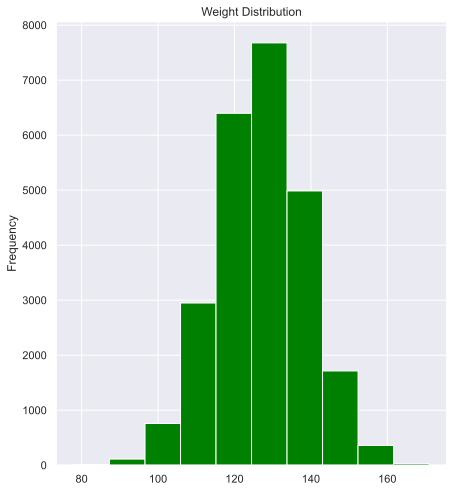

In [5]:
data['Weight'].plot(kind='hist', color='green', title='Weight Distribution')

##### Multitask code

In [6]:
def BMI(weight_pounds: float, height_inches: float) -> float:
    return 703 * (weight_pounds / (height_inches ** 2))

##### Task 3

Draw a picture that shows the pairwise dependencies of the features `Height`, `Weight` and `BMI`. Use `pairplot` function from Seaborn

In [7]:
data['BMI'] = BMI(data['Weight'], data['Height'])

In [8]:
# sns.pairplot(data[['Weight', 'Height', 'BMI']])

##### Task 4

Create in `data` new feature `weight_category` which will have 3 values:

1. weight less than 120 pounds (~54kg)
2. other weight
3. weight more than 150 pounds (~68kg)

Draw `boxplot` which demonstrates the relationships between height and weight category. Use `boxplot` method from Seaborn library and `apply` function from Pandas. Sign the y-axes — "Height", x-axes — "Weight Category"

In [9]:
def set_weight_category(weight_pounds: float):
    if weight_pounds < 120:
        return 1
    if weight_pounds > 150:
        return 3
    return 2

In [10]:
data['weight_category'] = data['Weight'].apply(set_weight_category)
data.head()

Index    Height    Weight        BMI  weight_category
0      1  65.78331  112.9925  18.355808                1
1      2  71.51521  136.4873  18.760773                2
2      3  69.39874  153.0269  22.336747                3
3      4  68.21660  142.3354  21.502458                2
4      5  67.78781  144.2971  22.075458                2

<Axes: xlabel='weight_category', ylabel='Height'>

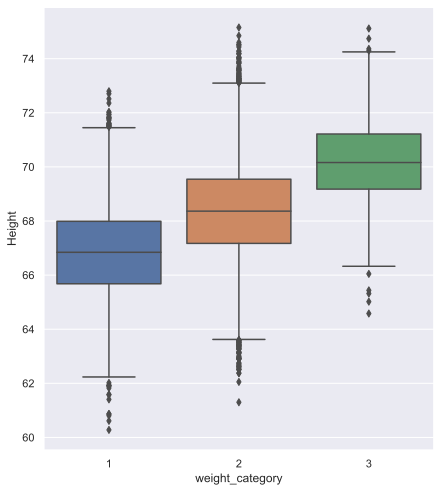

In [11]:
sns.boxplot(x=data['weight_category'], y=data['Height'])

##### Task 5

Draw `scatter plot` on **weight** depends using `plot` function
   > My comment: I translate tasks from Ukrainian to English, and wording of the task is unclear. As I understood, it was necessary to build a graph of the dependence of a person's height on his or her weight.

In [12]:
# data.plot.scatter(x='Weight', y='Height', c='DarkBlue', label='Weight')

##### Task 6

Write a function that will calculate quadratic error of approximating dependency of height $x$ on weight $y$ by two parameters $(w_0, w_1)$ with a straight line $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n (y_i - w_0 - w_1 * x_i)^2$$
where $n$ — number of observations in dataset, $y_i$ — height, $x_i$ — weight of $i$ person in dataset


In [13]:
def error(w0: float, w1: float, y: np.ndarray, x: np.ndarray):
    return np.sum((y - w0 - w1 * x) ** 2)

def line_error(w0: float, w1: float, y: np.ndarray, x: np.ndarray):
    return (y - w0 - w1 * x) ** 2

##### Task 7

Draw two lines on the graph from task 5 thar correspond to the values of the parameters $(w_0, w_1) = (60, 0.05)$ and $(w_0, w_1) = (50, 0.16). Use `plot` and `linspace` methods. Sign the axes and the graph

In [14]:
first_error = error(60, 0.05, data['Height'], data['Weight'])
print(first_error)

second_error = error(50, 0.16, data['Height'], data['Weight'])
print(second_error)

138197.3794281693
225065.24911287765


In [15]:
fig, ax = plt.subplots()

ax.scatter(x=data['Weight'], y=data['Height'], c='DarkBlue', label='Weight')

first_error_linear = np.linspace(0, first_error, 10)
# print(first_error_linear[:10])
ax.plot(first_error_linear, first_error_linear, c='Red', label='Error regression(first)')

second_error_linear = np.linspace(0, second_error, 10)
# print(second_error_linear[:10])
ax.plot(second_error_linear, second_error_linear, c='Green', label='Error regression (second)')

ax.set_xlabel('Weight')
ax.set_ylabel('Height')

ax.set_xlim(data['Weight'].min() * 0.7, data['Weight'].max() * 1.2)
ax.set_ylim(data['Height'].min() * 0.7, data['Height'].max() * 1.2)

plt.show()

> Because in both cases the error is huge, these two lines almost collide with each other

##### Task 8

Plot the dependence of the error function calculated in task 6 on the parameter $w_0$ at $w_0 = 50$. Sign axes and graph

In [16]:
w1_testing = np.linspace(0, 1, num=100)

errors = [error(50, w1_testing[i], data['Height'], data['Weight']) for i in range(len(w1_testing))]

In [17]:
fig, ax = plt.subplots()

ax.scatter(x=data['Weight'], y=data['Height'], c='DarkBlue', label='Weight')

ax.set_xlim(data['Weight'].min() * 0.7, data['Weight'].max() * 1.2)
ax.set_ylim(data['Height'].min() * 0.7, data['Height'].max() * 1.2)

x_axes = np.round(np.linspace(0, max(errors), len(errors)), 2)

for calculated_error in errors:
    error_linear = np.linspace(0, calculated_error, len(errors))
    ax.plot(x_axes, error_linear, linewidth=2, label=calculated_error)
plt.show()

##### Task 9

Plot 3D-graph depends on error function calculated in task 6 from parameters $w_0$ and $w_1$. Sing $x$ axes "**Intercept**", $y$ — "**Slope**", $z$ — "**Error**"

In [18]:
w0_testing = np.linspace(50, 60, num=100)
errors = [error(w0_testing[i], w1_testing[i], data['Height'], data['Weight']) for i in range(len(w1_testing))]

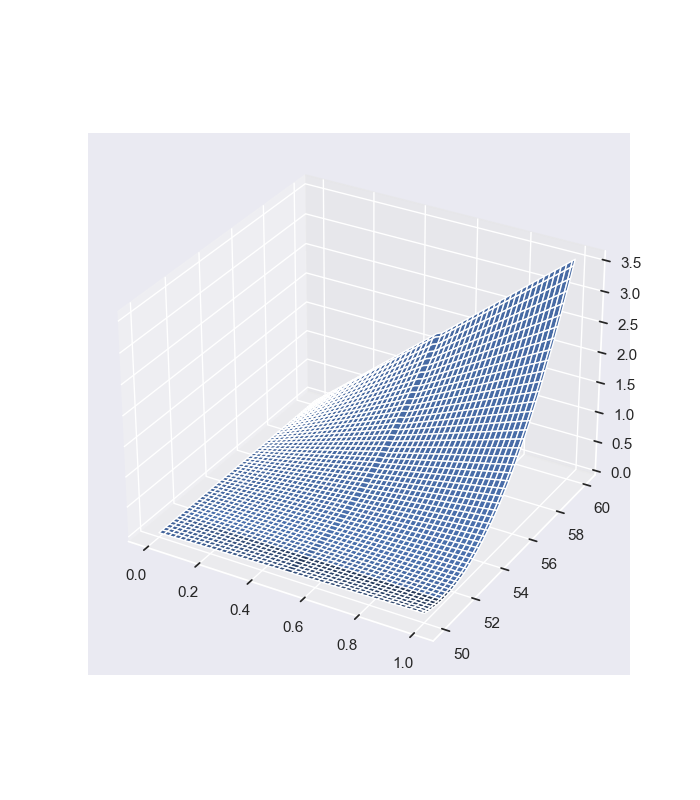

In [19]:
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_axes = np.round(w1_testing, 2)
y_axes = np.round(w0_testing, 2)
z_axes = np.array([np.linspace(0, error, len(x_axes)) for error in errors])

x_axes, y_axes= np.meshgrid(x_axes, y_axes)

ax.plot_surface(x_axes, y_axes, z_axes)

plt.show()
